In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("data/train.csv")

In [3]:
df.sample(10)

,Lat,Long_,Deaths,Case_Fatality_Ratio
3022,40.611169,-77.610707,NaN,2.035847
2144,33.128257,-90.522527,47.0,2.059597
922,37.558625,-120.997072,NaN,1.089404
468,-19.054400,-169.867200,0.0,0.000000
3704,38.415312,-78.282203,47.0,1.519069
2089,47.773725,-96.401346,127.0,1.218576
3870,43.464922,-89.335890,146.0,0.759151
736,33.268798,-86.662326,NaN,0.638266
3964,48.922600,24.711100,NaN,1.913791
1596,38.478897,-98.756367,123.0,1.622905


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lat                  3925 non-null   float64
 1   Long_                3925 non-null   float64
 2   Deaths               2458 non-null   float64
 3   Case_Fatality_Ratio  3972 non-null   float64
dtypes: float64(4)
memory usage: 125.6 KB


In [5]:
df.isnull().sum()

Lat                      91
Long_                    91
Deaths                 1558
Case_Fatality_Ratio      44
dtype: int64

- For the Lat and the Long_ , 91 data points were missing.
- So it has to be removed since the future analysis has to take the coordinates and also their missing quantities were roughly $2%$
- For the CFR vales, the missing values were merely $1%$ of the total values present in the table  
- But for the <b>Deaths</b> , they had a significant missing values which were around $40%$ of the data, so it is better to fill the NaN values with 0, since the NaN meant to be empty, which signifies <b>no death</b>

In [6]:
df

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,NaN,3.779217
1,41.153300,20.168300,NaN,1.077234
2,28.033900,1.659600,NaN,2.536905
3,42.506300,1.521800,165.0,0.345543
4,-11.202700,17.873900,NaN,1.836434
...,...,...,...,...
4011,31.952200,35.233200,NaN,0.811686
4012,39.904200,116.407400,0.0,0.000000
4013,15.552727,48.516388,NaN,18.074508
4014,-13.133897,27.849332,NaN,1.201603


In [7]:
df.dropna(subset=['Lat', 'Long_', 'Case_Fatality_Ratio'], axis=0)

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,NaN,3.779217
1,41.153300,20.168300,NaN,1.077234
2,28.033900,1.659600,NaN,2.536905
3,42.506300,1.521800,165.0,0.345543
4,-11.202700,17.873900,NaN,1.836434
...,...,...,...,...
4011,31.952200,35.233200,NaN,0.811686
4012,39.904200,116.407400,0.0,0.000000
4013,15.552727,48.516388,NaN,18.074508
4014,-13.133897,27.849332,NaN,1.201603


In [8]:
new_df = df.copy(deep=True)

In [9]:
new_df

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,NaN,3.779217
1,41.153300,20.168300,NaN,1.077234
2,28.033900,1.659600,NaN,2.536905
3,42.506300,1.521800,165.0,0.345543
4,-11.202700,17.873900,NaN,1.836434
...,...,...,...,...
4011,31.952200,35.233200,NaN,0.811686
4012,39.904200,116.407400,0.0,0.000000
4013,15.552727,48.516388,NaN,18.074508
4014,-13.133897,27.849332,NaN,1.201603


In [10]:
new_df.dropna(subset=['Lat', 'Long_', 'Case_Fatality_Ratio'], axis=0 , inplace=True)

In [11]:
new_df

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,NaN,3.779217
1,41.153300,20.168300,NaN,1.077234
2,28.033900,1.659600,NaN,2.536905
3,42.506300,1.521800,165.0,0.345543
4,-11.202700,17.873900,NaN,1.836434
...,...,...,...,...
4011,31.952200,35.233200,NaN,0.811686
4012,39.904200,116.407400,0.0,0.000000
4013,15.552727,48.516388,NaN,18.074508
4014,-13.133897,27.849332,NaN,1.201603


In [12]:
new_df.isnull().sum()

Lat                       0
Long_                     0
Deaths                 1546
Case_Fatality_Ratio       0
dtype: int64

In [13]:
new_df.fillna({'Deaths': 0}, inplace=True)

In [14]:
new_df['Deaths'] = new_df['Deaths'].astype(int)
new_df

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,0,3.779217
1,41.153300,20.168300,0,1.077234
2,28.033900,1.659600,0,2.536905
3,42.506300,1.521800,165,0.345543
4,-11.202700,17.873900,0,1.836434
...,...,...,...,...
4011,31.952200,35.233200,0,0.811686
4012,39.904200,116.407400,0,0.000000
4013,15.552727,48.516388,0,18.074508
4014,-13.133897,27.849332,0,1.201603


In [15]:
new_df.isnull().sum()

Lat                    0
Long_                  0
Deaths                 0
Case_Fatality_Ratio    0
dtype: int64

### Here the missing values have been taken care of
- The Lat, Long_ and the Case_Fatality_Rate have been removed 
- The Deaths with NaN have been set to 0 

In [16]:
new_df.insert(3, 'Confirmed', (new_df['Deaths'] / new_df['Case_Fatality_Ratio']) * 100)

In [17]:
new_df.replace([np.inf, -np.inf], np.nan, inplace=True)
new_df.fillna(0, inplace=True)
new_df['Confirmed'] = new_df['Confirmed'].astype(int)
new_df

,Lat,Long_,Deaths,Confirmed,Case_Fatality_Ratio
0,33.939110,67.709953,0,0,3.779217
1,41.153300,20.168300,0,0,1.077234
2,28.033900,1.659600,0,0,2.536905
3,42.506300,1.521800,165,47751,0.345543
4,-11.202700,17.873900,0,0,1.836434
...,...,...,...,...,...
4011,31.952200,35.233200,0,0,0.811686
4012,39.904200,116.407400,0,0,0.000000
4013,15.552727,48.516388,0,0,18.074508
4014,-13.133897,27.849332,0,0,1.201603


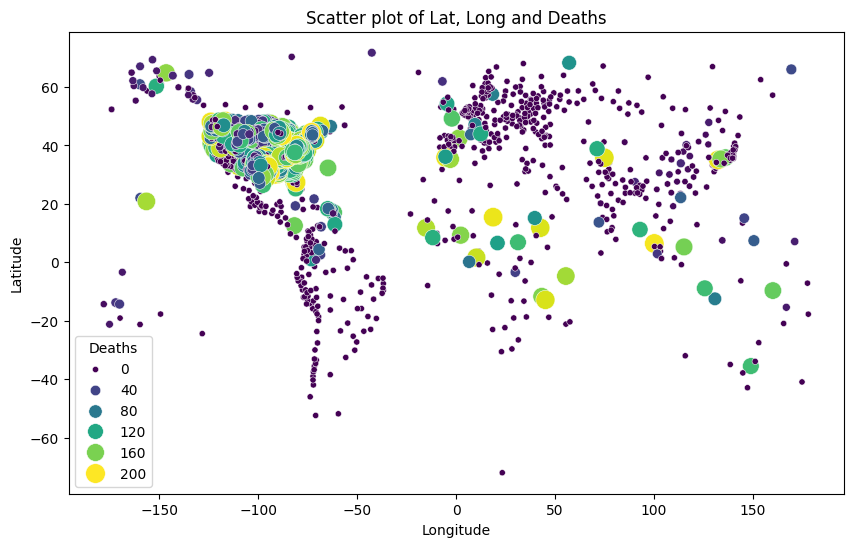

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x='Long_', y='Lat', size='Deaths', hue='Deaths', palette='viridis', legend=True, sizes=(20, 200))
plt.title('Scatter plot of Lat, Long and Deaths')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [19]:
# new_df[new_df['Deaths'] > 10].sort_values(by='Deaths', ascending=False)

In [20]:
train_df, test_df = train_test_split(new_df, test_size=0.1, random_state=42)

# save into csv
train_df.to_csv('data/train_data.csv', index=False)
test_df.to_csv('data/test_data.csv', index=False)

In [21]:
# Loading train and test data
train_df = pd.read_csv('data/train_data.csv')
test_df = pd.read_csv('data/test_data.csv')

# Selection of features and target variables
features = ['Lat', 'Long_', 'Case_Fatality_Ratio']  
X_train = train_df[features]
y_train_confirmed = train_df['Confirmed']
y_train_deaths = train_df['Deaths']

X_test = test_df[features]
y_test_confirmed = test_df['Confirmed']
y_test_deaths = test_df['Deaths']


In [30]:
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
import numpy as np

# Define models
models = {
    'RandomForest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'SVR': SVR()
}

# Train and evaluate each model
results = {}
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train_confirmed)
    y_pred_confirmed = model.predict(X_test)
    mse_confirmed = mean_squared_error(y_test_confirmed, y_pred_confirmed)
    
    model.fit(X_train, y_train_deaths)
    y_pred_deaths = model.predict(X_test)
    mse_deaths = mean_squared_error(y_test_deaths, y_pred_deaths)
    
    results[name] = {'Confirmed_RMSE': np.sqrt(mse_confirmed), 'Deaths_RMSE': np.sqrt(mse_deaths)}
    trained_models[name] = model

# Print results
for name, metrics in results.items():
    print(f"{name} - Confirmed Cases RMSE: {metrics['Confirmed_RMSE']}, Deaths RMSE: {metrics['Deaths_RMSE']}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 3529, number of used features: 3
[LightGBM] [Info] Start training from score 3946.616039
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 3529, number of used features: 3
[LightGBM] [Info] Start training from score 44.238311
RandomForest - Confirmed Cases RMSE: 11129.938078913998, Deaths RMSE: 50.44280195638616
XGBoost - Confirmed Cases RMSE: 15609.849198502849, Deaths RMSE: 52.91324064122561
LightGBM - Confirmed Cases RMSE: 9437.670733123792, Deaths RMSE: 50.28904828932695
SVR - Confirmed Cases RMSE: 10870.857023122257, Deaths RMSE: 56.

In [23]:
new_df["Deaths"].sort_values(ascending=False).head(1000)

3465    200
3617    200
3477    200
3827    200
1879    200
       ... 
3888     75
3255     75
2087     75
3516     75
3472     75
Name: Deaths, Length: 1000, dtype: int64

In [28]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=len(features), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
    return model

# Create models for confirmed cases and deaths
model_confirmed_nn = create_model()
model_deaths_nn = create_model()

# Train the model for confirmed cases
model_confirmed_nn.fit(X_train, y_train_confirmed, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Train the model for deaths
model_deaths_nn.fit(X_train, y_train_deaths, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test data
loss_confirmed, rmse_confirmed = model_confirmed_nn.evaluate(X_test, y_test_confirmed, verbose=0)
loss_deaths, rmse_deaths = model_deaths_nn.evaluate(X_test, y_test_deaths, verbose=0)

print(f"Neural Network - Confirmed Cases RMSE: {rmse_confirmed}, Deaths RMSE: {rmse_deaths}")


/home/kkp/Desktop/Predictioneer/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 149495680.0000 - root_mean_squared_error: 11445.1367 - val_loss: 57312820.0000 - val_root_mean_squared_error: 7570.5229
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 66951220.0000 - root_mean_squared_error: 8161.4053 - val_loss: 49239908.0000 - val_root_mean_squared_error: 7017.1152
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 45475768.0000 - root_mean_squared_error: 6707.1626 - val_loss: 45851816.0000 - val_root_mean_squared_error: 6771.3970
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 44648684.0000 - root_mean_squared_error: 6616.8062 - val_loss: 45753752.0000 - val_root_mean_squared_error: 6764.1519
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 50843556.0000 - root_mean_squared_error: 7028.9014 - val_loss: 45683116.0000 - val_root_mean_squared_error: 6758.9287
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 55108788.0000 - root_mean_squared_error: 

In [39]:
print(trained_models.keys())

dict_keys(['RandomForest', 'XGBoost', 'LightGBM', 'SVR'])
